In [ ]:
#%% import
import numpy as np
import gym

#%% hyperparameters
REPS = 20
EPISODES = #2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 135

#%%environment
env = gym.make('Taxi-v3')
env.seed(seed = STUDENT_NUM)
Initial_State = env.reset()

#%% get familiar with the environment
print("you can see the environment in each step by render command :")
env.render()

#%% base code for Q-learning

env = gym.make('Taxi-v3')
env.seed(seed = STUDENT_NUM)


for rep in range(REPS): 
    agent = # Agent Object instance from Algorithm_name(e.g Q_learning_agent) class which has inherited from Agentbase.
    for episode in range(EPISODES):
        Initial_state = env.reset()

        for ... :

            bestAction = np.random.choice(ACTIONS)

            next_state,rew,done,_ = environment.step(bestAction)
            
            if done:
                break

SyntaxError: ignored

## Start

In [1]:
pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install gym==0.26.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import gym
import numpy as np
import pickle, os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [4]:
STUDENT_NUM = 135

In [5]:
#%%environment
env = gym.make('Taxi-v3')
Initial_State, info = env.reset(seed = STUDENT_NUM)

In [6]:
# down=0, up=1, right=2, left=3, pickup=4, dropoff=5
n_state  = env.observation_space.n
n_action = env.action_space.n

In [7]:
observation, reward, terminated, truncated, info = env.step(0)

## Q Learning

In [101]:
class Agent_Q:
    def __init__(self, episods = 1, alpha = 0.1,gamma = 0.9, eps = 0.1, lr_cons = True, runs = 20 ):
        
        self.alpha = alpha
        self.episods = episods
        self.eps = eps
        self.n_state = env.observation_space.n
        self.n_action = env.action_space.n
        self.Q_value = np.zeros([self.n_state, self.n_action])
        self.G = 0
        self.lr_cons = lr_cons
        self.reward_sum = []
        self.reward_mean = []
        self.Q_value_mean = []
        self.runs = runs
        self.gamma = gamma
        self.max_step = 100

    def update_eps(self, k):
        max_eps = 1.0
        min_eps = 0.02
        decay_rate = 0.005
        #self.eps = 100/(100+k)
        self.eps = min_eps + (max_eps - min_eps)*np.exp(-decay_rate*k)
    def update_alpha(self, k):
        max_alpha = 0.9
        min_alpha = 0.01
        decay_rate = 0.005
        if self.lr_cons == False:
            self.alpha = min_alpha + (max_alpha - min_alpha)*np.exp(-decay_rate*k)
    
    def take_action(self, state, k):
        

        policy = [np.argmax(self.Q_value[state]), np.random.randint(0, self.n_action) ] #policy
        #print(policy)
        action = np.random.choice(policy, 1, p=[ (1-self.eps), self.eps])#eps = random, 1-eps = argmax
        #print(action)
        return action[0]
        #return np.argmax(self.Q_value[state])
    
    def update(self, state,next_state, action, reward):
      
        self.Q_value[state][action] = self.Q_value[state][action] + self.alpha * (reward + self.gamma * np.max(self.Q_value[next_state]) - self.Q_value[state][action]) #behavior policy
        self.G += reward

        
    def q_learning(self):

        for episod in range(self.episods):
            terminated = False
            self.G, reward = 0, 0
            state, info = env.reset(seed = STUDENT_NUM)
            #update epsilon
            self.update_eps(episod)
            self.update_alpha(episod)
            #print(self.alpha)
            first_state = state
            rewards = []
            step = 0
            for step in range(self.max_step):
                action = self.take_action(state, episod)
                next_state, reward, terminated, truncated, info = env.step(action)
                rewards.append(reward)
                self.update(state, next_state, action, reward)
                if terminated:
                  break
                state = next_state
            self.reward_sum.append(np.sum(rewards))
            self.reward_mean.append(np.mean(rewards))
        return self.reward_sum, self.reward_mean, self.Q_value

    def n_runs(self):
        n_rewards = []
        n_Q_values = []
        
        for i in tqdm(range(self.runs)):
            self.reward_sum = []
            self.reward_mean = []
            self.Q_value = np.zeros([self.n_state, self.n_action])
            sum_rewards, mean_rewards, mean_Q_value = self.q_learning()
            n_rewards.append(sum_rewards)
            n_Q_values.append(mean_Q_value)
        return np.mean(np.array(n_rewards),axis =0), np.mean(np.array(n_Q_values),axis =0)

In [102]:
agent_q = Agent_Q(2000, 0.1, 0.9,0.1, True,20)#episods, alpha=lr, gamma=discoutn_factor, eps, lr_cons, runs
mrq1, mqv1 = agent_q.n_runs()

  0%|          | 0/20 [00:00<?, ?it/s]

In [108]:
agent_q2 = Agent_Q(2000,0.1, 0.9, 0.1, False,20)#episods, alpha, gamma, eps, lr_cons, runs
mrq2, mqv2 = agent_q2.n_runs()

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Q_learning algorithm')

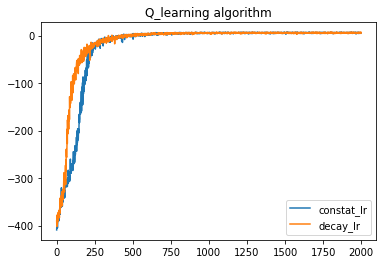

In [121]:
import matplotlib.pyplot as plt
plt.plot(mrq1)
plt.plot(mrq2)
#plt.ylim([-200, 100])
plt.legend(['constat_lr', 'decay_lr'])
plt.title("Q_learning algorithm")

## Sarsa

In [125]:
class Agent_Sarsa:
    def __init__(self, episods = 1,runs = 20, alpha = 0.1,gamma = 0.9, eps = 0.1, eps_cons = True ):
        
        self.alpha = alpha
        self.episods = episods
        self.eps = eps
        self.n_state = env.observation_space.n
        self.n_action = env.action_space.n
        self.Q_value = np.zeros([self.n_state, self.n_action])
        self.G = 0
        self.eps_cons = eps_cons
        self.reward_sum = []
        self.reward_mean = []
        self.runs = runs
        self.gamma = gamma
        self.max_step = 100


    def update_eps(self, k):
        max_eps = 1
        min_eps = 0.02
        decay_rate = 0.005
        self.eps = min_eps + (max_eps - min_eps)*np.exp(-decay_rate*k)

    def take_action(self, state, k):

        policy = [np.argmax(self.Q_value[state]), np.random.randint(0, self.n_action) ]
        action = np.random.choice(policy, 1, p=[ (1-self.eps), self.eps])#eps = random, 1-eps = argmax
        return action[0]
    
    def update(self, state,next_state, action, action_prime, reward):
        self.Q_value[state][action] += self.alpha * (reward + self.gamma * self.Q_value[next_state][action_prime] - self.Q_value[state][action])
        self.G += reward


        
    def sarsa(self):

        for episod in range(self.episods):
            terminated = False
            self.G, reward = 0, 0
            state, info = env.reset(seed = STUDENT_NUM)
            self.update_eps(episod)
            #update epsilon
            first_state = state
            rewards = []
            action = self.take_action(state, episod)
            step = 0
            for step in range(self.max_step):
                next_state, reward, terminated, truncated, info = env.step(action)
                action_prime = self.take_action(next_state, episod)
                rewards.append(reward)
                self.update(state, next_state, action, action_prime, reward)
                if terminated:
                  break
                state = next_state
                action = action_prime
            self.reward_sum.append(np.sum(rewards))
            self.reward_mean.append(np.mean(rewards))
        return self.reward_sum, self.reward_mean

    def n_runs(self):
        n_rewards = []
        for i in tqdm(range(self.runs)):
            self.reward_sum = []
            self.reward_mean = []
            sum_rewards, mean_rewards = self.sarsa()
            n_rewards.append(sum_rewards)

        return np.mean(np.array(n_rewards),axis =0)


In [127]:
agent_sarsa = Agent_Sarsa(2000,20, 0.1, 0.9, 0.1)#episods,runs, alpha = 0.618,gamma = 0.9, eps = 0.1, eps_cons = True ):
mrs = agent.n_runs()

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Sarsa algorithm')

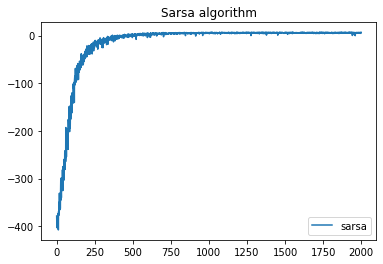

In [129]:
plt.plot(mrs)
plt.legend(['sarsa'])
plt.title("Sarsa algorithm")

## n_step sarsa

In [130]:
class N_step_sarsa:
    def __init__(self, episods = 1, alpha = 0.1,gamma=0.9, eps = 0.1, n = 3, eps_cons = True ):
      self.alpha = alpha
      self.episods = episods
      #self.n_episodes = 20
      self.eps = eps
      self.n_state = env.observation_space.n
      self.n_action = env.action_space.n
      self.Q_value = np.zeros([self.n_state, self.n_action])
      #self.G = 0
      self.n = n
      self.T = float("inf")
      self.tau = 0
      self.eps_cons = eps_cons
      self.reward_sum = []
      self.reward_mean = []
      self.gamma = gamma
      self.runs = 20
      #self.max_epsilon = 0.5
      #self.min_epsilon = 0.001
      #self.decay_rate = 0.05
      self.Q_value_runs = []
      #self.Reward_run_episode = np.zeros((n_runs,n_training_episodes))
      self.stored_states = []
      self.stored_actions = []
      self.stored_rewards = []

    def update_eps(self, k):
        max_eps = 1
        min_eps = 0.02
        decay_rate = 0.005
        self.eps = min_eps + (max_eps - min_eps)*np.exp(-decay_rate*k)

    def take_action(self, state, k):

        policy = [np.argmax(self.Q_value[state]), np.random.randint(0, self.n_action) ]
        action = np.random.choice(policy, 1, p=[ (1-self.eps), self.eps])#eps = random, 1-eps = argmax
        return action[0]

    def update(self):
        pass
    def step_tree(self):
        
         for episode in tqdm(range(self.episods)):
                            
              self.T = float("inf")
              t = 0

              self.stored_states = []
              self.stored_actions = []
              self.stored_rewards = []

              #epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)


              state, info = env.reset(seed = STUDENT_NUM)
              self.update_eps(episode)
              self.stored_states.append(state)
              terminated = False
              total_episode_reward = 0

              action = self.take_action(state, episode)
              self.stored_actions.append(action)


              while True:
          
                  if t < self.T:
                    next_state, reward, terminated, _, _ = env.step(action)
                    self.stored_states.append(next_state)
                    self.stored_rewards.append(reward)
                    total_episode_reward += reward

                    if terminated:
                      self.T = t + 1 
                      RT = reward
                    else:
                      next_action = self.take_action(next_state, episode)
                      self.stored_actions.append(next_action)

                  self.tau = t - self.n + 1

                  if self.tau >=0:

                      start_index = self.tau + 1
                      end_index = min(self.tau + self.n, self.T)
                      G = 0
                      for i in range(start_index, end_index ):  
                          G += self.gamma**(i - self.tau - 1) * self.stored_rewards[i]

                      if self.tau + self.n < self.T:
                          G += self.gamma**self.n * self.Q_value[self.stored_states[(self.tau + self.n)]][self.stored_actions[(self.tau + self.n)]]
                      s_tau = self.stored_states[self.tau]
                      a_tau = self.stored_actions[self.tau]
                      self.Q_value[s_tau][a_tau] += self.alpha * (G - self.Q_value[s_tau][a_tau])
                    
                  
                      state = next_state
                      action = next_action
                  t += 1

                  if self.tau == self.T - 1:
                      break
              self.reward_sum.append(np.sum(self.stored_rewards))
              self.reward_mean.append(np.mean(self.stored_rewards))
         return self.reward_sum, self.reward_mean

    def n_runs(self):
        n_rewards = []
        for i in tqdm(range(self.runs)):
            self.reward_sum = []
            self.reward_mean = []
            sum_rewards, mean_rewards = self.step_tree()
            n_rewards.append(sum_rewards)

        return np.mean(np.array(n_rewards),axis =0)

In [131]:
agent_n = N_step_sarsa(2000, 0.1, 0.9, 0.1, 2)# episods = 1, alpha = 0.618,gamma = 0.9, eps = 0.1, n = 3 eps_cons = True
mrns2 = agent_n.n_runs()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0.5, 1.0, '2_step_sarsa')

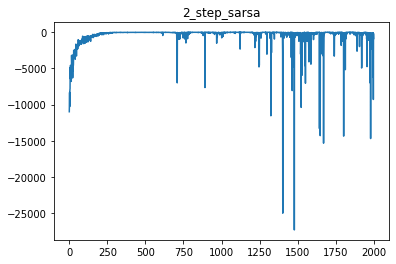

In [145]:
plt.plot(mrns2)
plt.title('2_step_sarsa')

In [133]:
agent_n3 = N_step_sarsa(2000, 0.1, 0.9, 0.1, 3)# episods = 1, alpha = 0.618,gamma = 0.9, eps = 0.1, n = 3 eps_cons = True
mrns3 = agent_n3.n_runs()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0.5, 1.0, '3_step_sarsa')

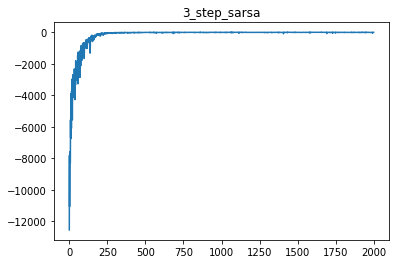

In [146]:
plt.plot(mrns3)
plt.title('3_step_sarsa')

In [132]:
agent_n4 = N_step_sarsa(2000, 0.1, 0.9, 0.1, 4)# episods = 1, alpha = 0.618,gamma = 0.9, eps = 0.1, n = 3 eps_cons = True
mrns4 = agent_n4.n_runs()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0.5, 1.0, '4_step_sarsa')

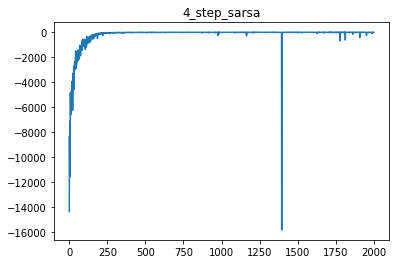

In [147]:
plt.plot(mrns4)
plt.title('4_step_sarsa')

Text(0.5, 1.0, 'n_step_sarsa for 3 different n')

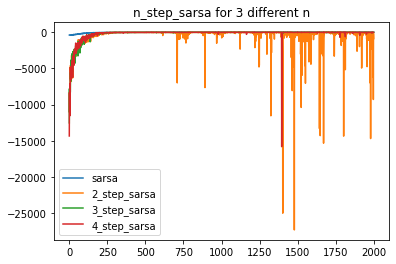

In [148]:
plt.plot(mrs)
plt.plot(mrns2)
plt.plot(mrns3)
plt.plot(mrns4)
#plt.ylim([-1000,100])
plt.legend(['sarsa', '2_step_sarsa', '3_step_sarsa', '4_step_sarsa'])
plt.title('n_step_sarsa for 3 different n')

## Off policy Monte-carlo

In [177]:
class Monte_OffPolicy:
    def __init__(self, episods = 1, alpha = 0.618,gamma = 0.9 , eps = 0.1, eps_cons = True ):
        
        self.alpha = alpha
        self.episods = episods
        self.eps = eps
        self.gamma = gamma
        self.n_state = env.observation_space.n
        self.n_action = env.action_space.n

        self.Q_value = np.zeros([self.n_state, self.n_action])
        self.C = np.zeros([self.n_state, self.n_action])
        self.policy = np.random.choice([i for i in range(self.n_action)], self.n_state)
        #self.G = 0
        self.eps_cons = eps_cons
        self.reward_sum = []
        self.reward_mean = []

    def update_eps(self, k):
        max_eps = 1.0
        min_eps = 0.02
        decay_rate = 0.005
        #self.eps = 100/(100+k)
        self.eps = min_eps + (max_eps - min_eps)*np.exp(-decay_rate*k)
    
    def take_action(self, state, k):

        policy = [np.argmax(self.Q_value[state]), np.random.randint(0, self.n_action) ]
        action = np.random.choice(policy, 1, p = [ (self.eps), (1 - self.eps)])#eps = random, 1-eps = argmax
        return action[0]
    
    def behavior_policy(self, state):

      policy = np.ones(self.n_action, dtype=float) * ((1-self.eps)/ (self.n_action-1))
      action = np.argmax(self.Q_value[state])
      policy[action] = self.eps
      return policy

    def target_policy(self, state):
        policy = np.zeros_like(self.Q_value[state], dtype=float)
        best_action = np.argmax(self.Q_value[state])
        policy[best_action] = 1.0
        return policy




    def generate(self, behavior_policy):

        episode = []
        state, info = env.reset(seed = STUDENT_NUM)
        reward = 0
        count = 0
        while reward != 20:
            # Sample an action from our policy

            probs = self.behavior_policy(state)
            action = np.random.choice(np.arange(self.n_action), p=probs)

            next_state, reward, done, truncated, info = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        return episode
        
    def update(self, state,next_state, action, action_prime, reward):
        self.Q_value[state][action] += self.alpha * (reward + self.Q_value[next_state][action_prime] - self.Q_value[state][action])
        self.G += reward
        
    
    def off_policy(self):

        for e in range(self.episods):
            

            b  = agent.behavior_policy() # down=0, up=1, right=2, left=3, pickup=4, dropoff=5
            self.update(e)
            episod = self.generate(b)
  
            G = 0
            W = 1
            rewards = []

            # state, action, reward
            for s, a, r in reversed(episod):
                #print(s, a, r)
                G = self.gamma * G + r
                self.C[s][a] = self.C[s][a] + W
                self.Q_value[s][a] = (self.Q_value[s][a]) + (W/self.C[s][a] * (G - self.Q_value[s][a]))
                self.policy[s] = np.argmax(self.Q_value[s][a])
                #print(a, self.policy[s])
                if a != np.argmax(self.target_policy(s)):
                  break
                rewards.append(r)
                W = W * (1/self.behavior_policy(s)[a])
                

            self.reward_sum.append(np.sum(rewards))
            self.reward_mean.append(np.mean(rewards))


In [ ]:
agent_monte = Monte_OffPolicy(episods = 100, alpha = 0.9,gamma = 0.9, eps = 0.1, eps_cons = True)
#agent_monte.off_policy()
#mr_monte = agent.reward_mean
agent_monte.off_policy()


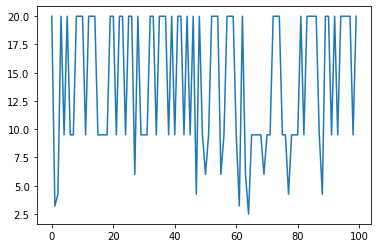

In [ ]:
plt.plot(mr1)

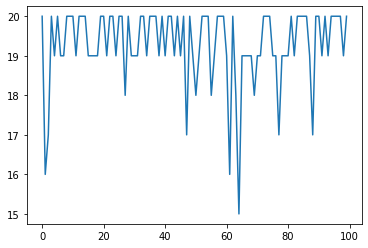

In [ ]:
sr = agent.reward_sum
plt.plot(sr)